<h1 style="line-height: 1.5"><center>Analysis of how economic factors influence customers preferences towards restaurants in the U.S.</center></h1>
<h3><center>Phutanate Pisutsin - 1010803212</center></h3>

## 1. Introduction

Customers are hearts and souls of restaurants. As a service business, restaurants aim to cater their options, services, and features to best captivate their target customers. Thanks to online platform these days like Yelp, people can review diners, discuss their opinions, and explore their options more conveninetly. This leads to a massive collection of customers insight, opening up opportunities for business to utilize such data to study what make customers satisfied most. 

Given the wide range of determining factors, this paper will channel the focus to ones that may relate to customers economically. Hence, the samples will be divided into groups by states in order to use variations in financial status of each state as precursor for constructing dependent variables for the study. For instance, different income levels and costs of living among states may impact their residents' lifestyles and needs - hence dining included. 

While using the rating users gave to restaurants as the independent or Y variable, variables that relate directly to consumer's behavior such as shop's price range and their income will be studied that may be suspected to, namely, reservation requirement will be investigated whether it has any correlation. Given the Yelp's dataset as a foundation, external daatasets will be incorporated to provide the financial information about customers.This paper will answer the questions of what do customers prefer in restaurants ranging from desireable price level to favorable amenities and attributes, following their financial background by inspecting the relationship and correlation of multiple variables.

Chosen dataset - 12: Yelp <br>

installing all the requirements

In [2]:
pip install -q pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


convert data from .json to usable csv data

## Section I: Data cleaning

This dataset comprises of 5 tables:
1. Business
2. Check in
3. Review
4. Tip
5. User

However, we will not inspect `Tip` due to its irrelevance.

We will analyze what kind of insights can be gathered from them, crop out the irrelevant columns, and perform descriptive analysis to inspire the research question.

In [3]:
import pandas as pd

CHUNK_SIZE = 1000
CHUNK_NUMBER = 150
pd.options.display.max_colwidth = 100

# this function helps digest the large dataset from Yelp to avoid problems due to GPU limitation

def clean_up(reader, chunkNumber):
    cleaned_df = pd.DataFrame([])
    chunk_count = 0
    for chunk in reader:
        chunk_count += 1
        chunk.rename({"Unnamed: 0": "number"}, axis="columns", inplace = True)
        chunk.set_index("number", inplace = True)
        cleaned_df = pd.concat([cleaned_df, chunk], axis=0)
        if chunk_count >= chunkNumber:
            return cleaned_df
    return cleaned_df

In [4]:
# review dataset

review_reader = pd.read_csv('C:\\D\\CUHK\\Toronto\\eco225\\week-3\\datasets\\yelp_academic_dataset_review.csv', chunksize=CHUNK_SIZE)
review_raw = clean_up(review_reader, CHUNK_NUMBER)
# drop the textual review as it is qualitative data
# drop the reactions other users give to the reviews
review = review_raw.drop(['text', 'useful', 'funny', 'cool'], axis=1)
review.set_index('review_id', inplace = True)
print("'review' dataset")
review

'review' dataset


,user_id,business_id,stars,date
review_id,,,,
KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,2018-07-07 22:09:11
BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,2012-01-03 15:28:18
saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,2014-02-05 20:30:30
AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,2015-01-04 00:01:03
Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,2017-01-14 20:54:15
...,...,...,...,...
Khw0jW0CdTfINgcDX8Su4Q,92GawvubZ4vuMCQOvn7Cyg,b0syqzR1F-EmprvTVs23ng,5,2014-08-17 13:48:57
OKAxfFCaXGFoHjjt3xmL6g,2hXZduxlahxqLz8RlNouyw,tr366vgAkbcpJBVKSdBxZg,3,2018-01-15 01:34:37
cwfqwOdDSV_FiS08xjeUbA,hLiBbJD4S2RUE_kdIYyHaQ,mY02hIpeZSVCaWObvvyECA,5,2009-01-10 05:19:19


In [5]:
# user dataset

user_reader = pd.read_csv('C:\\D\\CUHK\\Toronto\\eco225\\week-3\\datasets\\yelp_academic_dataset_user.csv', chunksize=CHUNK_SIZE)
user_raw = clean_up(user_reader, CHUNK_NUMBER)
user = user_raw[['user_id', 'name', 'review_count']]
print("'user' dataset")
user

'user' dataset


,user_id,name,review_count
number,,,
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665
3,SZDeASXq7o05mMNLshsdIA,Gwen,224
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79
...,...,...,...
149995,o1VTv6_aBKsWllGczl5MSA,Jeanne,9
149996,ZIsw90n2VxOFcAReErTadw,Marci,1
149997,xNlGKP_eT-sgsmzWa9OIVg,Sherwood,18


Observation: the information of users' names and review counts will not be meaningful to our study.

In [6]:
# check in dataset

checkin_reader = pd.read_csv('C:\\D\\CUHK\\Toronto\\eco225\\week-3\\datasets\\yelp_academic_dataset_checkin.csv', chunksize=CHUNK_SIZE)
checkin = clean_up(checkin_reader, CHUNK_NUMBER)
checkin.set_index(['business_id'], inplace = True)
print("'check in' dataset")
checkin

'check in' dataset


,date
business_id,
---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020-07-24 22:42:27, 2020-10-24 21:36:13, 2020-12-09 2..."
--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011-07-18 22:30:31, 2012-09-07 20:28:50, 2013-03-27 1..."
--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012-03-11 10:30:02, 2012-04-24 07:07:59, 2012-04-24 0..."
--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014-09-30 14:41:47, 2014-10-23 18:22:28, 2015-04-27 1..."
...,...
zznJox6-nmXlGYNWgTDwQQ,"2013-03-23 16:22:47, 2013-04-07 02:03:12, 2013-07-06 12:36:22, 2014-04-14 22:48:44, 2014-05-18 1..."
zznZqH9CiAznbkV6fXyHWA,2021-06-12 01:16:12
zzu6_r3DxBJuXcjnOYVdTw,"2011-05-24 01:35:13, 2012-01-01 23:44:33, 2012-01-07 01:47:24, 2012-05-22 20:02:40, 2012-05-23 1..."


In [8]:
# business dataset

business_reader = pd.read_csv('C:\\D\\CUHK\\Toronto\\eco225\\week-3\\datasets\\yelp_academic_dataset_business.csv', chunksize=CHUNK_SIZE)
business_raw = clean_up(business_reader, CHUNK_NUMBER)

# for geographic information, only retain city, state, and postal_code to group up business by regions
# retain attributes and categories
# these variables will be the independent variables of our study
print(business_raw)
business = business_raw.drop(['address', 'is_open', 'latitude', 'longitude'], axis = 1)
business.set_index(['business_id'], inplace = True)
business.fillna({}, inplace = True)

# add a new column to "business" to help us inquire the price range of the restaurant
business['priceRange'] = 1
for i in range (2, 5):
   business.loc[business['attributes'].str.contains(f"'RestaurantsPriceRange2': '{i}'", na = False, case=False), 'priceRange'] = i
print("'business' dataset")
# business
# business[business['attributes'].str.contains('Ambience', case=False, na=False)]['attributes']

                   business_id                      name  \
number                                                     
0       Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1       mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2       tUFrWirKiKi_TAnsVWINQQ                    Target   
3       MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4       mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   
...                        ...                       ...   
149995  lXWbCLYCEgM-coiPU1sQxw         Papa John's Pizza   
149996  Tz13KMJj899nhqpJvOksWQ      Mosaic Modern Fusion   
149997  km3eDGqOMxygC3UviNxseg                PMI Nevada   
149998  s8KD46Rk-jC8MZPXk47MHA            CKO Kickboxing   
149999  YMqvj4O6VGoisSgzORw-dg                Jalapeno's   

                                 address           city state postal_code  \
number                                                                      
0                 1616 Chapala St, Ste 2  Santa Barbara    CA    

## Research idea brain-storming
### columns of the table

Note: this sub-section is also a part of the GPT exercise.

Below are the userful quantitative variables from each table in my opinions.

* **Review** - `reviewer`, `stars`, `reactions to the review`, `date`
* **User** -  `review given`, reaction to the review(s) given: `useful` `funny` `cool`, `elite status`, `compliment received`
* **Business** - `name`, `location`, `stars`, `review count`, `nature of business`, `attributes` e.g., allow parking, accept card
* **Check in** - `checked in date & time`
* **Tip** - does not have insightful quantitative variable

### research ideas

with the variables available, we could explore further into these areas. Followed is the challenges we may encounter in doing them
* investigate the regional effect of a restaurant’s attributes on its customer satisfaction.
   * challenges: isolate the impact of the restaurant’s attributes from that of other factors. <br><br>
* investigate the influence of business ratings on that of geographically adjacent ones.
   * challenges: generate sound spatial division of areas to form different sample groups. <br><br>
* analysis of how economic factors influence customers preferences towards restaurants in the U.S.
   * challenges: quantify economic information of regions and handle the variability of restaurants’ properties. <br><br>
* investigate how reviewers’ elite status impacts their reviews’ perception and restaurants.
   * challenges: isolate the effects of elite status from, namely, review content and attributes of restaurants. <br><br>
* analyze the correlation between the reviews’ sentiment and business success.
   * technical complexity in using NLP and ML and subjectivity in analyzing qualitative data. <br><br>

### chosen topic (reiteration)
Analysis of how economic factors influence customers preferences towards restaurants in the U.S.

 > ratings given will be used as people's satisfaction / preferences towards the restaurants

## Section II. descriptive analysis of the data

We will try to obtain some general ideas about the dataset to motivate our research question and prove whether we are asking the right questions. In the later stage, we could integrate this finding with the financial, economic data to draw further correlation. Also, findings in this section will help guiding us in searching for relevant economic data to supplement this study.

### 1. the average rating of business in each state

In [93]:
import matplotlib.pyplot as plt
import numpy as np

print("number of restaurants avilable in Yelp by state")
print(business.groupby('state').size())

number of restaurants avilable in Yelp by state
state
AB      5561
AZ      9881
CA      5191
CO         3
DE      2262
FL     26262
HI         2
ID      4457
IL      2140
IN     11220
LA      9909
MA         2
MI         1
MO     10885
MT         1
NC         1
NJ      8517
NV      7703
PA     33965
SD         1
TN     12026
TX         4
UT         1
VI         1
VT         1
WA         2
XMS        1
dtype: int64


The states that do not have sufficient sample size, e.g., CO and HI, will be dismissed

<BarContainer object of 15 artists>

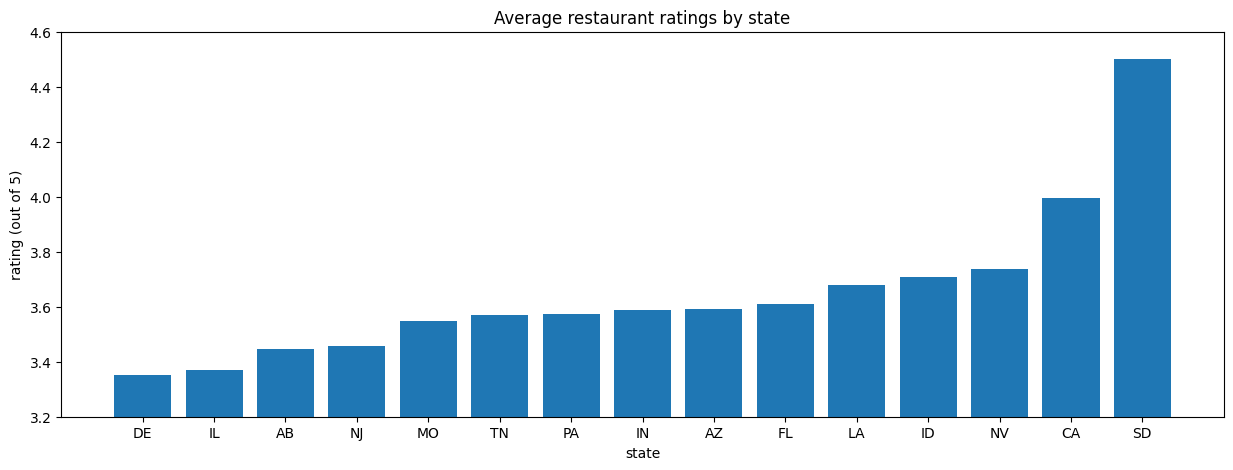

In [94]:
avg_rating = business.groupby('state')['stars'].mean().to_frame()
avg_rating.sort_values(by=['stars'], inplace = True)
# drop the data of these three states due to their small sample size
avg_rating.drop(['CO', 'HI', 'NC', 'MI', 'MA', 'MT', 'TX', 'UT', 'VI', 'VT', 'WA', 'XMS'], inplace = True)
plt.figure(figsize=(15, 5))

# plot the graph of average rating of restaurants in each state
plt.title('Average restaurant ratings by state')
plt.xlabel('state')
plt.ylabel('rating (out of 5)')
plt.yticks(np.arange(3, 5.1, 0.2))
plt.ylim((3.2, 4.6)) # help highlight the difference among states
plt.bar(avg_rating.index, avg_rating['stars'])

The variation of a state-wide average rating towards restaurant motivates us that **there exists the difference** in how people receive restaurants in multiple location, prompting us to investigate into the root factors.

* below code iterates through the `attributes` columns of all data to see what are the all possible attributes restaurants may possess 

In [115]:
# obtain all the list of attributes recorded in Yelp

import ast

unique_keys = {}

# Iterate over each row in the df
for attribute_obj in business['attributes']:
    # if it is a null value, i.e., not a string, ignore it.
    if not isinstance(attribute_obj, str): continue
    attribute_obj = ast.literal_eval(attribute_obj)
    for key in attribute_obj.keys():
        if key in unique_keys:
            unique_keys[key] += 1
        else:
            unique_keys[key] = 1

# unique_keys now contains all unique attributes from the string in the 'attributes' column
print("List of all attributes the restaurants may have and the number of their occurrences")
df = pd.DataFrame(list(unique_keys.items()), columns=['Attribute', 'Occurrences'])
df

List of all attributes the restaurants may have and the number of their occurrences


,Attribute,Occurrences
0,ByAppointmentOnly,42239
1,BusinessAcceptsCreditCards,119483
2,BikeParking,72455
3,RestaurantsPriceRange2,85104
4,CoatCheck,5572
5,RestaurantsTakeOut,59704
6,RestaurantsDelivery,56144
7,Caters,40020
8,WiFi,56778
9,BusinessParking,90878


In [121]:
categories_exploded = business['categories'].str.strip('{}').str.split(', ').explode()

# Step 2: Use value_counts() to count the occurrences of each category
category_counts = categories_exploded.value_counts()

# Convert the Series to a dictionary
category_counts_dict = category_counts.to_dict()

# Display the dictionary
category_counts_dict


{'Restaurants': 52142,
 'Food': 27711,
 'Shopping': 24346,
 'Home Services': 14320,
 'Beauty & Spas': 14253,
 'Nightlife': 12255,
 'Health & Medical': 11861,
 'Local Services': 11179,
 'Bars': 11044,
 'Automotive': 10748,
 'Event Planning & Services': 9874,
 'Sandwiches': 8342,
 'American (Traditional)': 8118,
 'Active Life': 7668,
 'Pizza': 7069,
 'Coffee & Tea': 6676,
 'Fast Food': 6455,
 'Breakfast & Brunch': 6222,
 'American (New)': 6087,
 'Hotels & Travel': 5845,
 'Home & Garden': 5787,
 'Fashion': 5726,
 'Burgers': 5624,
 'Arts & Entertainment': 5422,
 'Auto Repair': 5420,
 'Hair Salons': 5035,
 'Nail Salons': 4612,
 'Mexican': 4584,
 'Italian': 4563,
 'Specialty Food': 4219,
 'Doctors': 3757,
 'Pets': 3749,
 'Real Estate': 3567,
 'Seafood': 3532,
 'Fitness & Instruction': 3286,
 'Professional Services': 3263,
 'Hair Removal': 3233,
 'Desserts': 3182,
 'Chinese': 3162,
 'Bakeries': 3139,
 'Grocery': 3132,
 'Salad': 3057,
 'Hotels': 2971,
 'Chicken Wings': 2959,
 'Cafes': 2745,
 '

We can observe that certain attributes frequently occur and are easily identifiable in restaurants, having over tens of thousands of instances. However, upon analyzing them, we may pick up some of them that intuitively shall make difference towards restaurants between appearing in regions with different financial status.

**RestaurantsPriceRange2** - describing the range of restaurant's price from 1 (cheapest) to 4 (most expensive) <br>

Note: more attributes from this section may be used, depending on the suggestion from external dataset and studies to be incorporated in the later stage

In [100]:
# # By-appointment-only restaurants
# # investigating the stat of restuarants that require Appointments

# business_appointment = business[business['attributes'].str.contains("'GoodForMeal'", na=False, case=False)]
# pd.options.display.max_colwidth = 500
# print(business_appointment[business_appointment.columns[0]].count())
# #business_appointment['attributes']

In [101]:
# # investigating the stat of restaurants that are 'Good for kids'

# business_goodForKids = business[business['attributes'].str.contains("'GoodForKids': 'True'", na=False, case=False)]
# business_goodForKids = business_goodForKids.groupby('state').size().to_frame()
# business_goodForKids.rename(columns={0: 'restaurant_count'}, inplace = True)
# # plt.bar(business_goodForKids.index, business_goodForKids['restaurant_count'])
# # plt.title("number of Good for kids restaurants by state")

### 2. generate illustrations to inspect the effect of the dependent variables

Price can be a big determining factor of customers' satisfaction towards restaurant. While it can be intuitively suggested that people tend to prefer goods at lower cost, price tags also set the customers' expectation towards food and services.

average rating of restaurants at each price range
   priceRange     stars
0           1  3.584501
1           2  3.633474
2           3  3.558713
3           4  3.272727


<BarContainer object of 4 artists>

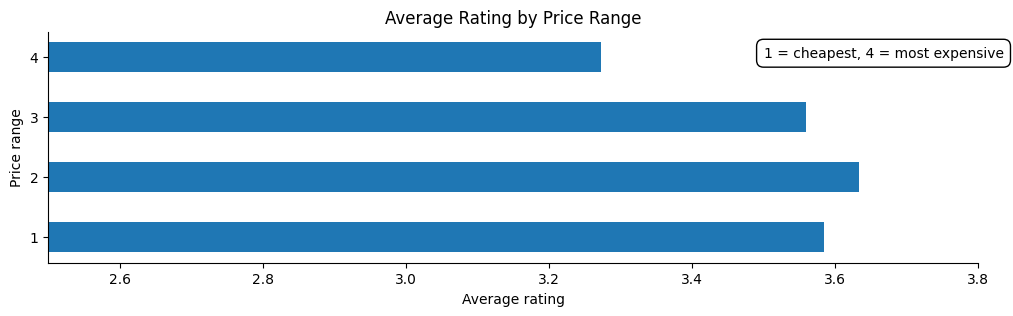

In [102]:
average_ratings = business.groupby('priceRange')['stars'].mean().reset_index()
print("average rating of restaurants at each price range")
print(average_ratings)
plt.figure(figsize=(12,3))
plt.xlabel('Average rating')
plt.yticks(range(1, 6))
plt.ylabel('Price range')
plt.xlim((2.5, 3.8))
plt.title('Average Rating by Price Range')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

remark_text = "1 = cheapest, 4 = most expensive"
plt.text(3.5, 4, remark_text, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'), transform=plt.gca().transData)

plt.barh(average_ratings['priceRange'], average_ratings['stars'], height = 0.5)


According to this graph, no clear correlation between price range and customer's satisfaction can be inferred as the cheapest option does not obtain the highest rating. With the goal to obtain how the trend might vary due to economic status, we could try observing the average ratings in different states.

Let's take _California_ (CA), _Tennessee_ (TN), and _Idaho_ (ID) as a representative state for the high-, medium-, and low-gdp groups, respectively.

* states with higher gdp are represented by darker lines

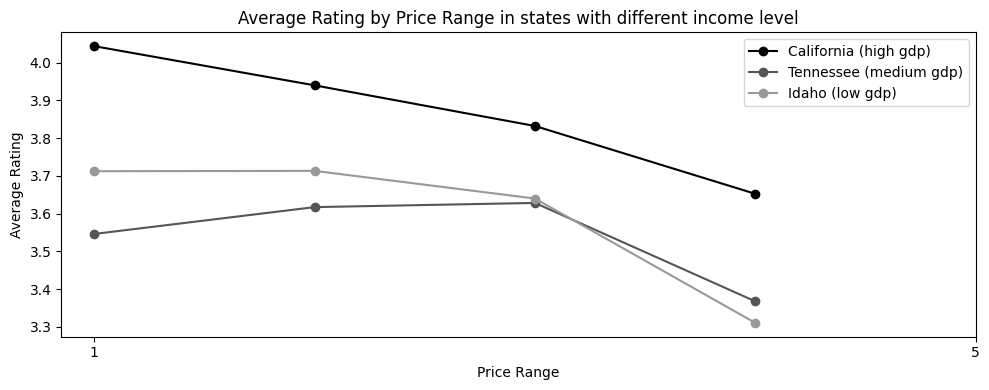

In [12]:
average_rating_CA = business[business['state'] == 'CA'].groupby('priceRange')['stars'].mean().reset_index()
average_rating_TN = business[business['state'] == 'TN'].groupby('priceRange')['stars'].mean().reset_index()
average_rating_ID = business[business['state'] == 'ID'].groupby('priceRange')['stars'].mean().reset_index()

fig, ax = plt.subplots(figsize=(10, 4))

dfs = [average_rating_CA, average_rating_TN, average_rating_ID]
states = ['California (high gdp)', 'Tennessee (medium gdp)', 'Idaho (low gdp)']
colors = ['#000000', '#555555', '#999999']

# Set axis labels and title
ax.set_xlabel('Price Range')
ax.set_title("Average Rating by Price Range in states with different income level")

# Iterate over each state and plot lines connecting average ratings
for i, (state, df, color) in enumerate(zip(states, dfs, colors)):
    # Group by 'priceRange' and calculate the average rating for each group
    average_ratings = df.groupby('priceRange')['stars'].mean().reset_index()

    # Plot a line graph for each state
    ax.plot(average_ratings['priceRange'], average_ratings['stars'], marker='o', label=state, color=color)

ax.set_ylabel('Average Rating')
plt.xticks((1,5))
ax.legend()
# Show the plot
plt.tight_layout()
plt.show()

Although the three graphs may imply a trend that the customer is less satisfied when the price is more expensive, it is worth noting that the state with higher gdp generally rate restaurants higher. This suggests us the possibility of investigating the factor that distinguish restaurants in such states (higher-gdp ones) than the rest to see the attributes of their better performance, and importantly, that the financial background of customers have impact on their restaurant preferences.

> So far, we have observed relations where there is only 1 continuous variable in the graph: average ratings.

As the economic situation changes over time, it is worthwhile to try using date as a Y-axis, inspecting the change of customers towards restaurants of same price over time to potentially draw some correlation with economic events happened in the corresponding time.

In [103]:
merged_df = review.merge(business[business['state'] == 'TN'], on='business_id')
review_with_priceRange = merged_df.copy()[['stars_x', 'date', 'priceRange']]
review_with_priceRange.loc[:, 'year'] = pd.to_datetime(review_with_priceRange['date']).dt.year
print("the number of restaurants at each price range by year")
print(review_with_priceRange.groupby(['year', 'priceRange']).count())

the number of restaurants at each price range by year
                 stars_x  date
year priceRange               
2005 1                 1     1
     2                 2     2
2006 1                 2     2
     2                15    15
     3                 6     6
2007 1                10    10
     2                24    24
     3                 4     4
2008 1                64    64
     2                91    91
     3                27    27
     4                 1     1
2009 1                33    33
     2                72    72
     3                21    21
2010 1                51    51
     2               202   202
     3                24    24
2011 1               148   148
     2               409   409
     3                77    77
     4                 1     1
2012 1               196   196
     2               585   585
     3                78    78
     4                 1     1
2013 1               254   254
     2               717   717
     3          

Due to the insuffient sample size and inavialbility, we will drop 2005's and 4-priceRange data.

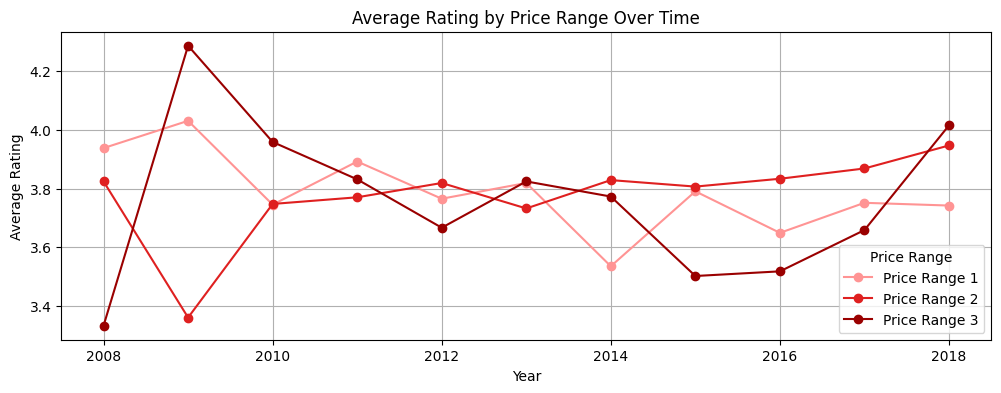

In [105]:
grouped_df = review_with_priceRange.groupby(['year', 'priceRange'])['stars_x'].mean().reset_index()
pivoted_df = grouped_df.pivot(index='year', columns='priceRange', values='stars_x')
pivoted_df.drop([2005, 2006, 2007], inplace = True)
pivoted_df.drop(columns=[4], inplace = True)

# Create a list of colors for each price range
colors = ['#FF9494', '#DF2020', '#9A0000']

plt.figure(figsize=(12, 4))

for i, column in enumerate(pivoted_df.columns):
    plt.plot(pivoted_df.index, pivoted_df[column], marker='o', label=f'Price Range {column}', color = colors[i])

plt.title('Average Rating by Price Range Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend(title='Price Range')
plt.grid(True)
plt.show()

We can observe that preferences of general public has been changing over time, also prompting us to inspect the effect of economic events and change occurred in this period between 2008 to 2018.

### Section III. Conclusions

In this step, we have done data-cleaning and some feature engineering to derive more usable datasets from what is provided. Although no clear correlation can be observed in this stage with this single data from Yelp, the illustrations created show us that dependent variables, namely, `time`, restaurant's `price range`, and `state's financial status`, have effects on people's preferences towards restaurants, motivating our research question.

Importantly, in the next step, we will integrate the financial data of each state, e.g., income on average and gdp per capita, from external sources to better distinguish the states into different sample groups and to see more of a **continuous** correlation between a range of economic factors and the ratings.

Also, to reiterate, more dependent variables may be used from the list of attributes from _business_ dataset to unfold more correlations at the later stage.